In [ ]:
import matplotlib.pylab as plt
import numpy as np
plt.style.use("/afs/ihep.ac.cn/users/l/luoxj/Style/Paper.mplstyle")
%config InlineBackend.figure_format = 'svg'
import sys
sys.path.append("/afs/ihep.ac.cn/users/l/luoxj/root_tool/python_script/")

In [ ]:
import uproot4 as up
import sys
sys.path.append("/afs/ihep.ac.cn/users/l/luoxj/root_tool/python_script/")
from importlib import reload

import PlotTrackOfProcess
reload(PlotTrackOfProcess)
from PlotTrackOfProcess import PlotTrackOfProcess

track_tool = PlotTrackOfProcess()

# v_particles = ["AmC"]
# v_particles_subdir = [""]
# v_name_files = ["user-detsim-206_DayaBay.root"]
# template_path =
#     "root://junoeos01.ihep.ac.cn//eos/juno/user/luoxj/Sim_DSNB/timing_constant_study/"
#     "{}/0_0_0/{}/detsim/user-root/{}"


check_result_with_track = False
v_particles = [ "Sr90" ]
# "K40", "Mn54"]
# v_particles = [  "Ge68" ]
# v_particles = [ "Cs137"]
v_name_files = ["user-detsim-_no_optical.root"]*len(v_particles)
v_neutron_filter = [False]*len(v_particles)
template_path = \
    "root://junoeos01.ihep.ac.cn//eos/juno/user/luoxj/Calibration_for_time_constants/{}/no_optical/{}"

In [15]:
import tqdm

dir_v_dE_dx_average = {}
dir_v_dE_dx_average_with_quench = {}
dir_v_equen = {}
dir_v_edep = {}
dir_index_evtID_of_equen = {}
for i,particle in enumerate(v_particles):
    name_file_full_path = template_path.format(particle,
                            v_name_files[i])
    # name_file_full_path = template_path.format(particle, v_name_files[i])
    track_tool.SetDataset(name_file_full_path)
    index_evtID_of_equen = track_tool.GetEvtIDOfDepTree()
    entries = track_tool.GetTotalEntries()
    v_dE_dx = []
    v_dE_dx_with_quench = []
    # v_equen = track_tool.Get_v_Equen(filter_n_capture=(particle=="neutron" or particle=="AmC"))
    # v_edep = track_tool.Get_v_Edep(filter_n_capture=(particle=="neutron" or particle=="AmC"))
    v_equen = track_tool.Get_v_Equen(filter_n_capture=False)
    v_edep = track_tool.Get_v_Edep(filter_n_capture=False)
    # for j_entry in tqdm.trange(entries)[:1000]:
    # entries = 20000
    n_figure_track = 0
    for j_entry in tqdm.trange(entries):
        # equen = track_tool.GetEquen(j_entry, filter_n_capture=True)
        dE_dx_average = track_tool.Get_Average_dE_dx(j_entry)
        dE_dx_average_with_quench = track_tool.Get_Average_dE_dx(j_entry,times_quench_factor=True)
        v_dE_dx.append(dE_dx_average)
        v_dE_dx_with_quench.append(dE_dx_average_with_quench)

        # if n_figure_track>10 and check_result_with_track:
        #     break
    dir_v_dE_dx_average[particle] = np.array(v_dE_dx)[index_evtID_of_equen]
    dir_v_equen[particle] = v_equen
    dir_v_dE_dx_average_with_quench[particle] = np.array(v_dE_dx_with_quench)[index_evtID_of_equen]
    dir_v_edep[particle] = v_edep
    dir_index_evtID_of_equen[particle] = index_evtID_of_equen

  0%|          | 0/5000 [00:00<?, ?it/s]/afs/ihep.ac.cn/users/l/luoxj/root_tool/python_script/PlotTrackOfProcess.py:385: RuntimeWarning: invalid value encountered in true_divide
  one_track_dE_dx = np.nan_to_num(one_track_dE/one_track_dx)
100%|██████████| 5000/5000 [00:01<00:00, 2735.99it/s]


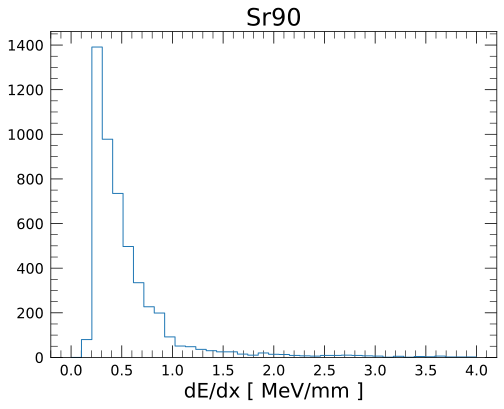

In [33]:
for particle in dir_v_dE_dx_average_with_quench.keys():
    plt.hist(dir_v_dE_dx_average_with_quench[particle], bins=np.linspace(0,4,40),
             histtype="step")
    plt.xlabel("dE/dx [ MeV/mm ]")
    plt.title(particle)
    plt.savefig(f"./figure/dE_dx_{particle}.png")
    # plt.semilogy()

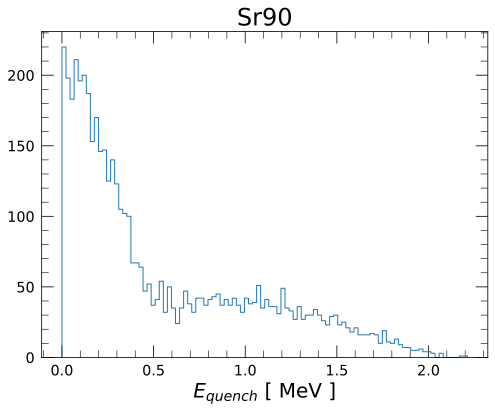

In [32]:
for particle in dir_v_dE_dx_average_with_quench.keys():
    plt.figure()
    plt.hist(dir_v_equen[particle], bins=100, histtype="step")
    plt.xlabel("$E_{quench}$ [ MeV ]")
    plt.title(particle)
    plt.savefig(f"./figure/Equen_{particle}.png")



4999
4999


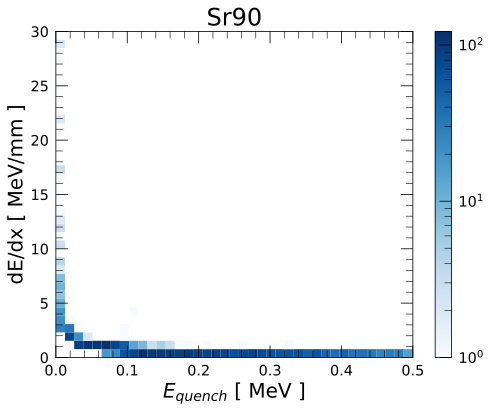

In [24]:
from matplotlib.colors import LogNorm
for particle in dir_v_dE_dx_average.keys():
# for particle in ["AmC"]:
    plt.figure()
    # print(len(dir_v_equen[particle][:len(dir_v_equen[particle])]))
    # print(len(dir_v_dE_dx_average_with_quench[particle]))
    print(len(dir_v_dE_dx_average_with_quench[particle]))
    print(len(dir_v_edep[particle]))
    plt.hist2d(dir_v_equen[particle][:len(dir_v_dE_dx_average_with_quench[particle])],
               dir_v_dE_dx_average_with_quench[particle],
               cmap="Blues", bins=(np.linspace(0,0.5,40),np.linspace(0,30,40)),
               norm=LogNorm())
    plt.colorbar()
    plt.xlabel("$E_{quench}$ [ MeV ]")
    plt.ylabel("dE/dx [ MeV/mm ]")
    plt.title(particle)
    plt.savefig(f"./figure/{particle}_Eqeun_dE_dx.png")

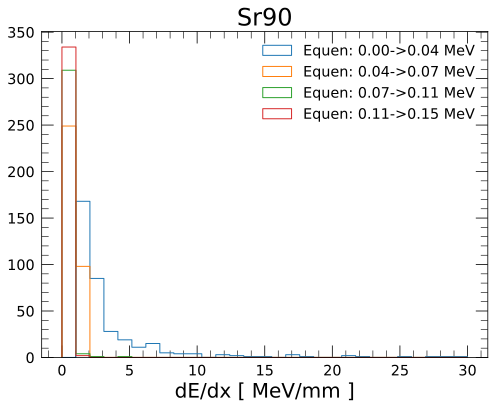

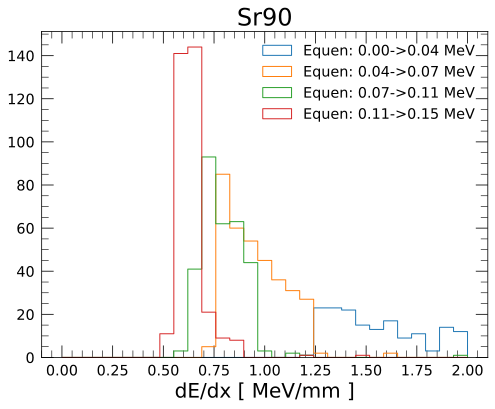

In [31]:
# bins_equen_AmC = np.linspace(0.6, 2.4,5)
bins_equen_AmC = np.linspace(0, 0.15, 5)
for particle in dir_v_dE_dx_average.keys():
    for i in range(len(bins_equen_AmC)-1):
        index_equen_cut_AmC = ((dir_v_equen[particle]>bins_equen_AmC[i])& (dir_v_equen[particle]<bins_equen_AmC[i+1]))
        plt.hist(np.array(dir_v_dE_dx_average_with_quench[particle])[index_equen_cut_AmC],
                 label=f"Equen: {bins_equen_AmC[i]:.2f}->{bins_equen_AmC[i+1]:.2f} MeV",histtype="step", bins=np.linspace(0,30,30))
    plt.legend()
    plt.xlabel("dE/dx [ MeV/mm ]")
    plt.title(particle)
    plt.savefig(f"./figure/projection_{particle}_dE_dx.png")

plt.figure()
for particle in dir_v_dE_dx_average.keys():
    for i in range(len(bins_equen_AmC)-1):
        index_equen_cut_AmC = ((dir_v_equen[particle]>bins_equen_AmC[i])& (dir_v_equen[particle]<bins_equen_AmC[i+1]))
        plt.hist(np.array(dir_v_dE_dx_average_with_quench[particle])[index_equen_cut_AmC],
                 label=f"Equen: {bins_equen_AmC[i]:.2f}->{bins_equen_AmC[i+1]:.2f} MeV",histtype="step", bins=np.linspace(0,2,30))
    plt.legend()
    plt.xlabel("dE/dx [ MeV/mm ]")
    plt.title(particle)
    plt.savefig(f"./figure/projection_{particle}_dE_dx_zoom_in.png")

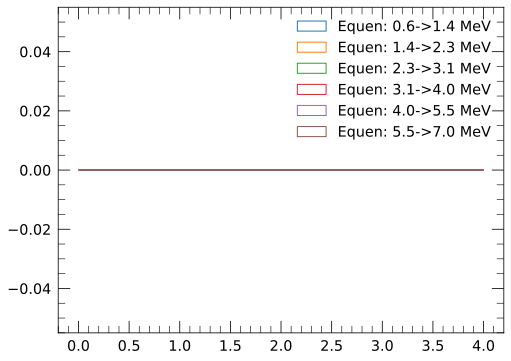

In [ ]:
from collections import Counter
for particle in dir_v_dE_dx_average.keys():
    dir_v_dE_dx_average_with_quench[particle] = np.array(dir_v_dE_dx_average_with_quench[particle])
    # bins_equen_AmC = np.linspace(0, 4, 6)
    for i in range(len(bins_equen_AmC)-1):
        index_equen_cut_AmC = ((dir_v_equen[particle]>bins_equen_AmC[i])& (dir_v_equen[particle]<bins_equen_AmC[i+1]))
        index_low_dE_dx = ( (dir_v_dE_dx_average_with_quench[particle]< 2.5) & (index_equen_cut_AmC) )
        num_index_low_dE_dx = np.where(index_low_dE_dx==True)[0]
        v_n_nCaputre = []
        for j in num_index_low_dE_dx:
            # print(track_tool.GetProcessNameWithEntrySource(i))
            v_n_nCaputre.append(Counter(track_tool.GetProcessNameWithEntrySource(j))["nCapture"])
        plt.hist(v_n_nCaputre,histtype="step",bins=range(0,5),
                 label=f"Equen: {bins_equen_AmC[i]:.1f}->{bins_equen_AmC[i+1]:.1f} MeV")
    plt.legend()

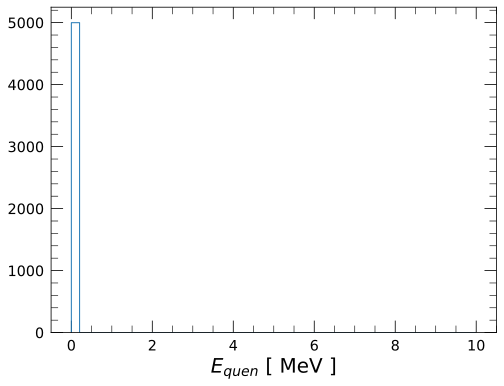

In [ ]:
for particle in dir_v_dE_dx_average.keys():
    plt.hist(dir_v_equen[particle], histtype="step",bins=np.linspace(0,10, 50))
    plt.xlabel("$E_{quen}$ [ MeV ]")
    plt.savefig(f"./figure/{particle}_Equen.png")

In [ ]:
# import PlotTrackOfProcess
# reload(PlotTrackOfProcess)
# from PlotTrackOfProcess import PlotTrackOfProcess
#
# track_tool = PlotTrackOfProcess()
#
particle = "PuC"
# name_file_full_path = template_path.format(particle, v_particles_subdir[0],
#                         v_name_files[0])
# track_tool.SetDataset(name_file_full_path)

dir_v_equen[particle] = np.array(dir_v_equen[particle])
threshold_Equen = 6
dir_index_evtID_of_equen[particle] = np.array(dir_index_evtID_of_equen[particle])
v_num_index_equen = dir_index_evtID_of_equen[particle][dir_v_equen[particle]>threshold_Equen]
v_Ek_neutron_initial = []
v_Ek_gamma_initail = []
for i_evtID in v_num_index_equen:
    # track_tool.PlotTrack(i_evtID, debug=True, print_track_info=True,
    #                      show_process_name=True)
    v_Ek_neutron_initial.append(track_tool.GetCertainPDGEkFromOneEvent(i_evtID, pdg=2112, only_create_process=""))
    v_Ek_gamma_initail.append(track_tool.GetCertainPDGEkFromOneEvent(i_evtID, pdg=22, only_create_process=""))


KeyError: 'PuC'

In [ ]:
plt.hist(np.concatenate(v_Ek_neutron_initial), bins=np.linspace(0,7,100),
         histtype="step", label="Neutron ( Initial )")
plt.hist(np.concatenate(v_Ek_gamma_initail), bins=np.linspace(0,7,100),
         histtype="step", label="gamma ( Initial )")
plt.xlabel("$E_k$ [ MeV ]")
plt.title(f"Equen Initial Particles above {threshold_Equen} MeV")
plt.legend()
plt.savefig(f"./figure/{particle}_Ek_initial.png")

In [ ]:
plt.hist(dir_v_dE_dx_average_with_quench[particle])

In [ ]:
for particle in dir_v_dE_dx_average.keys():
    plt.hist(dir_v_edep[particle], histtype="step", bins=50)
    plt.xlabel("$E_{dep}$ [ MeV ]")
    plt.savefig(f"./figure/{particle}_Edep.png")